__Import libraries and packages for analysis and extracting data.__

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import warnings

In [70]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress = True)
%matplotlib inline

In [71]:
# load data
data = pd.read_csv('BA_AirlineReviews.csv')
display(data.head(3))

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN


In [72]:
# data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

__Explority Data Analysis.__

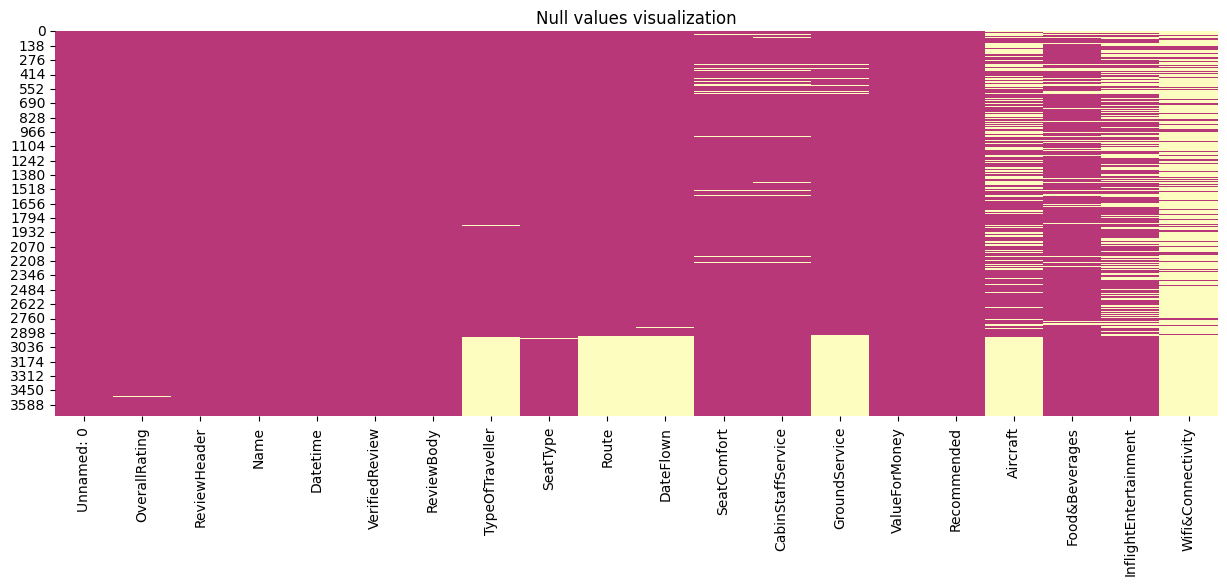

In [73]:
# plotting null values
plt.figure(figsize = (15,5))
sns.heatmap(data = data.isnull(), cmap = 'magma', vmin = -1, vmax = 1, cbar = False)
plt.title('Null values visualization')
plt.show();

In [74]:
# define function which will count percantage of null values compared to all values
def nulls_percent(df: pd.DataFrame) -> pd.DataFrame:
    null_features = [col for col in df.columns if df[col].isnull().sum() > 0]
    null_df = pd.DataFrame(columns = ['Column', 'Null Percentage'])

    for feature in null_features:
        count_null = data[feature].isnull().sum()
        percent = (count_null / df.shape[0]) * 100
        one_row = pd.DataFrame({null_df.columns[0]:[feature], null_df.columns[1]:[percent]})
        null_df = pd.concat([null_df, one_row], axis = 0, ignore_index = True)

    null_df_pivot = null_df.pivot_table(values = null_df.columns[1], index = null_df.Column)
    return null_df_pivot

null_df = nulls_percent(data)
display(null_df)

,Null Percentage
Column,
Aircraft,48.068090
CabinStaffService,3.431505
DateFlown,21.021346
Food&Beverages,10.429614
GroundService,22.858687
InflightEntertainment,31.072683
OverallRating,0.135099
Route,20.940286
SeatComfort,3.134288


In [75]:
# according to plot and given results from dataframe bellow, we are dropping some columns
data.drop([data.columns[0], data.columns[-1]], axis = 1, inplace = True)

In [76]:
# checking SeatType according to recommended
color_map = {'yes':'green', 'no':'red'}
fig = px.histogram(data_frame = data, x = 'SeatType', color = 'Recommended', 
                   color_discrete_map = color_map, title = 'Seat Types hue Recommended')
fig.update_layout(yaxis_title = 'Count')
fig.show();

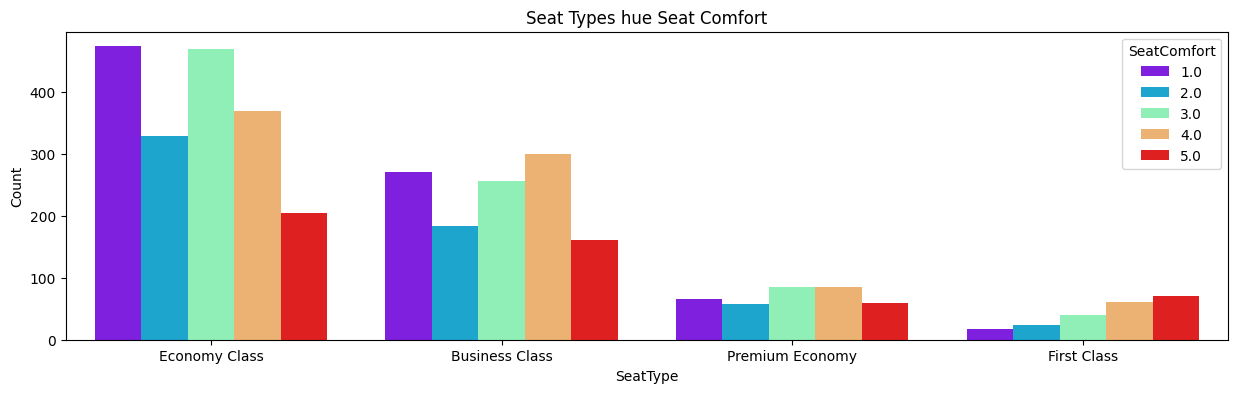

In [77]:
# checking SeatType hue SeatComfort
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'SeatType', hue = 'SeatComfort', palette = 'rainbow')
plt.title('Seat Types hue Seat Comfort')
plt.ylabel('Count')
plt.show();

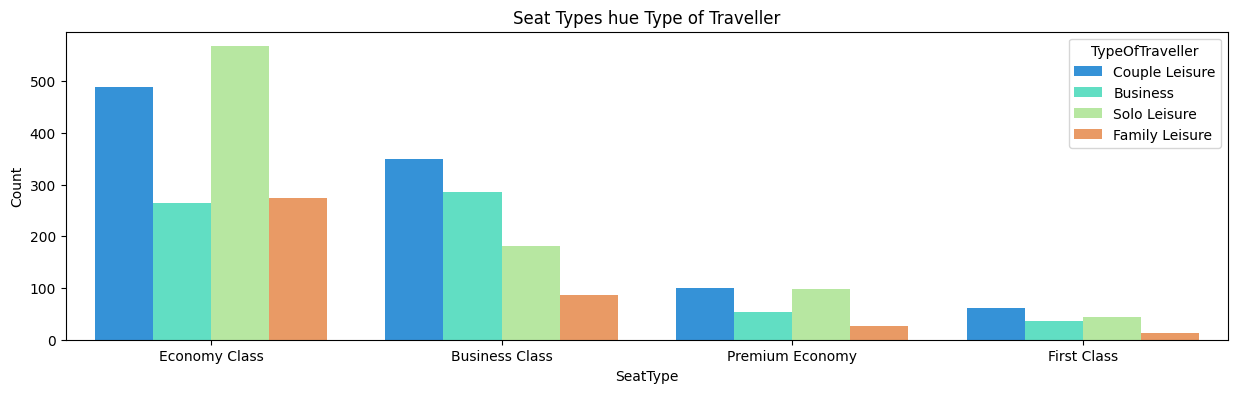

In [78]:
# Seattype hue TypeOfTraveller
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'SeatType', hue = 'TypeOfTraveller', palette = 'rainbow')
plt.title('Seat Types hue Type of Traveller')
plt.ylabel('Count')
plt.show();


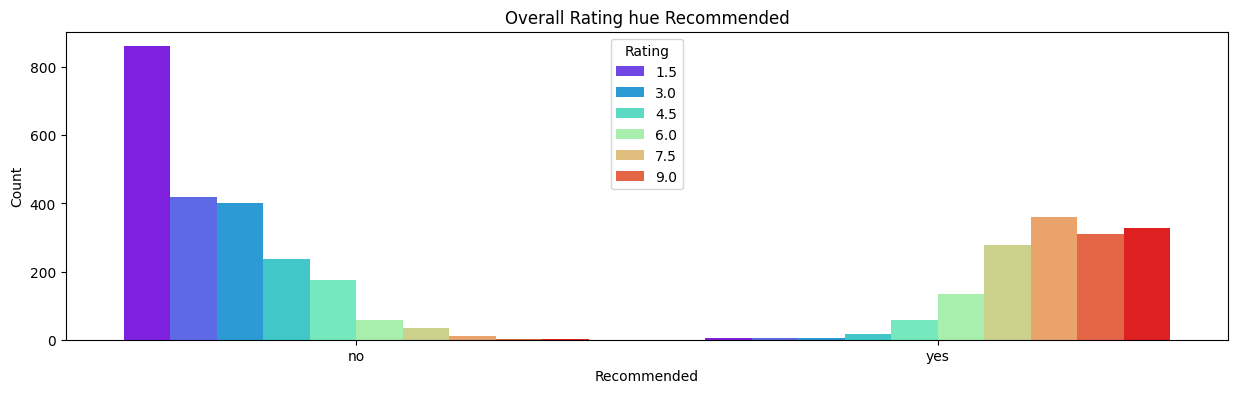

In [79]:
# check OverallRating hue Recommended
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'Recommended', hue = 'OverallRating', palette = 'rainbow')
plt.legend(loc = 'upper center', title = 'Rating')
plt.ylabel('Count')
plt.title('Overall Rating hue Recommended')
plt.show();

In [80]:
# look at Recommended
color_map = {'yes':'green', 'no':'red'}
fig = px.histogram(data_frame = data, x = 'Recommended', title = 'Recommended', color = 'Recommended', color_discrete_map = color_map)
fig.update_layout(yaxis_title = 'Count', xaxis_title = '')
fig.show()

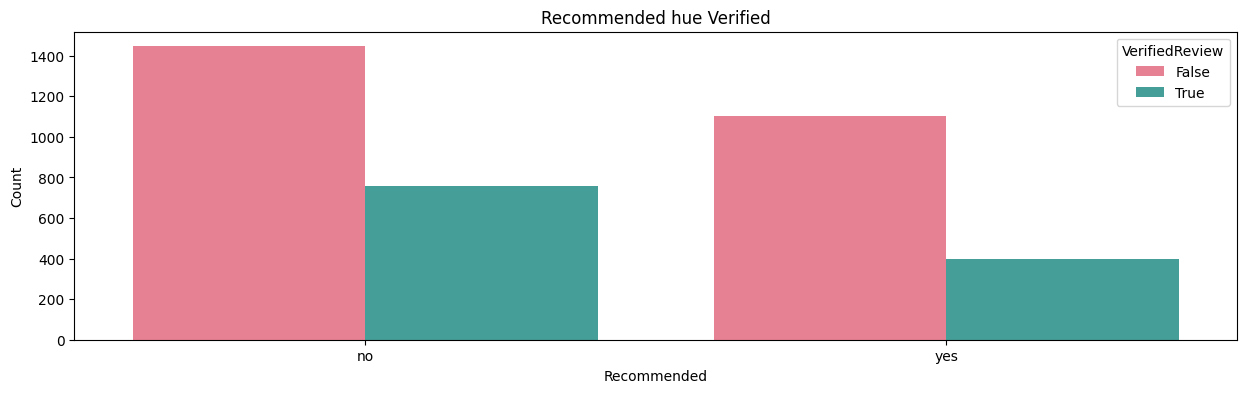

In [81]:
# Recommended hue VerifiedReview
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'Recommended', hue = 'VerifiedReview', palette = 'husl')
plt.ylabel('Count')
plt.title('Recommended hue Verified')
plt.show();

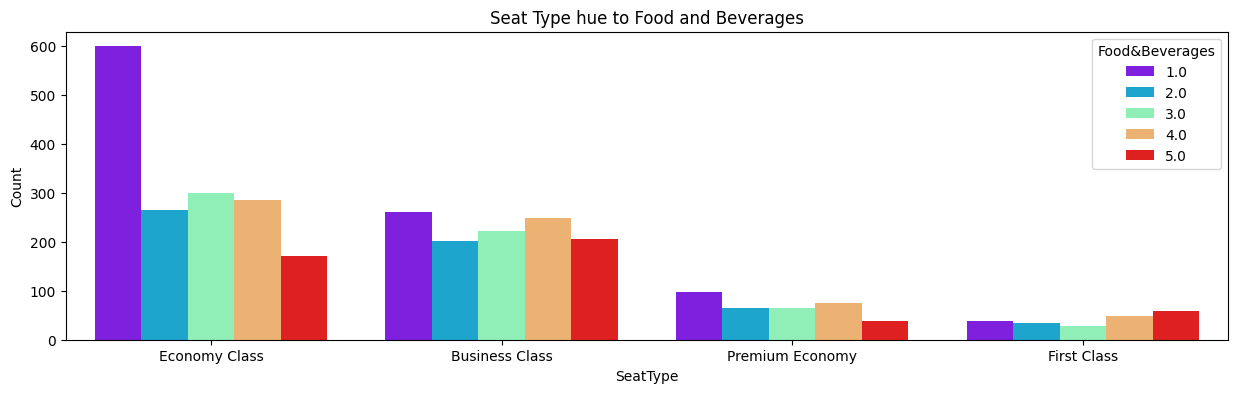

In [82]:
# SeatType hue to FoodAndBeverages
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'SeatType', hue = 'Food&Beverages', palette = 'rainbow')
plt.ylabel('Count')
plt.title('Seat Type hue to Food and Beverages')
plt.show();

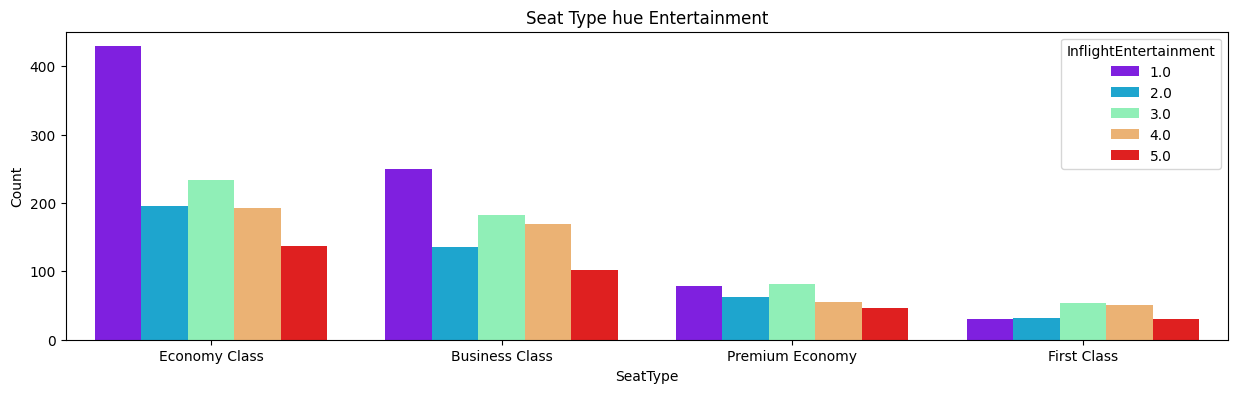

In [83]:
# SeatType hue Entertainment
plt.figure(figsize = (15,4))
sns.countplot(data = data, x = 'SeatType', hue = 'InflightEntertainment', palette = 'rainbow')
plt.ylabel('Count')
plt.title('Seat Type hue Entertainment')
plt.show();

In [84]:
# getting description of numeric values
data.describe()

,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment
count,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000
mean,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021
std,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
# function for looking at numeric features
def numeric_cols_plots(df: pd.DataFrame):
    numeric_features = [col for col in df.columns if df[col].dtype == np.number]
    plt.figure(figsize = (20,10))
    
    for i, col in enumerate(numeric_features):
        plt.subplot(2, 4, i + 1)
        sns.histplot(data = df, x = col, palette = 'rainbow')
        plt.title(col)
        plt.xlabel('')
        if i % 2 != 0 or i in (2, 6):
            plt.ylabel('')

    plt.tight_layout()
    plt.show();

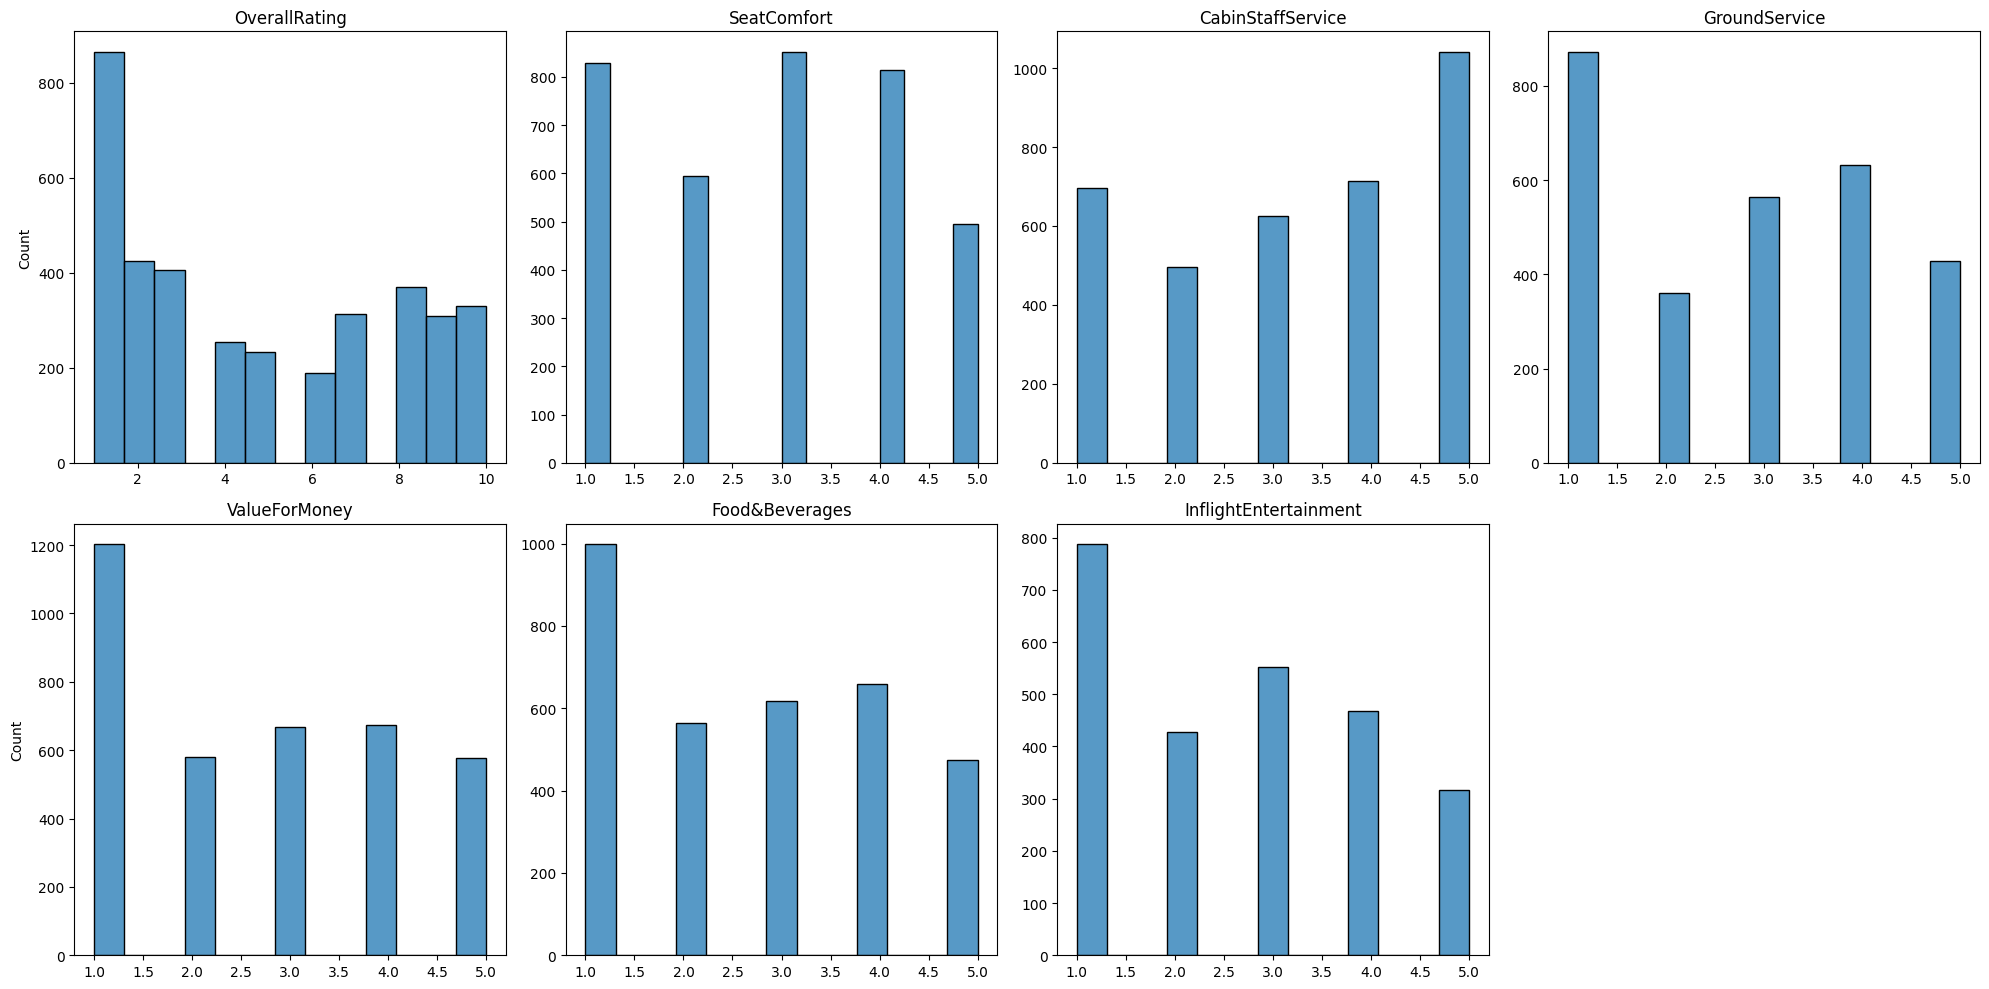

In [86]:
numeric_cols_plots(data)

In [87]:
# ValueForMoney hue Recommended
fig = px.histogram(data_frame = data, x = 'ValueForMoney', color = 'Recommended', title = 'Value For Money hue Recommended')
fig.update_layout(yaxis_title = 'Count', bargap = 0.2)
fig.show()

In [88]:
# creating Datetime column from DateFlown for grouping by months
data['Datetime'] = pd.to_datetime(data.DateFlown)
# grouping
num_features = [col for col in data.columns if data[col].dtype == np.number]
grouped_by_years = data[num_features].groupby(by = data.Datetime.dt.year).aggregate([np.mean, np.median])
display(grouped_by_years)

OverallRating        SeatComfort        CabinStaffService         \
                  mean median        mean median              mean median   
Datetime                                                                    
2014.0        6.111111    7.0    3.666667    4.0          3.888889    5.0   
2015.0        5.094937    5.0    2.918803    3.0          3.382479    4.0   
2016.0        4.843694    4.0    2.924596    3.0          3.335727    4.0   
2017.0        3.858929    3.0    2.549091    2.0          2.826642    3.0   
2018.0        4.511834    4.0    2.768997    3.0          3.156442    3.0   
2019.0        4.747024    4.0    2.850467    3.0          3.293750    4.0   
2020.0        4.031915    3.0    2.986111    3.0          3.500000    4.0   
2021.0        4.301075    3.0    2.878049    3.0          3.382716    4.0   
2022.0        3.940092    3.0    2.770408    3.0          3.077320    3.0   
2023.0        3.234310    2.0    2.455357    2.5          2.887387    3.0   

         GroundService        ValueForMoney        Food&Beverages         \
                  mean median          mean median           mean median   
Datetime                                                                   
2014.0        4.000000    4.0      3.222222    3.0       3.000000    3.0   
2015.0        2.995745    3.0      2.841772    3.0       2.928251    3.0   
2016.0        2.888099    3.0      2.706927    3.0       2.626838    3.0   
2017.0        2.739677    3.0      2.285714    2.0       2.110883    2.0   
2018.0        2.894260    3.0      2.600592    2.0       2.709677    3.0   
2019.0        2.892966    3.0      2.675595    3.0       2.863469    3.0   
2020.0        2.960526    3.0      2.382979    2.0       2.868852    3.0   
2021.0        2.522727    2.0      2.580645    2.0       2.897059    3.0   
2022.0        2.425743    2.0      2.281106    2.0       2.569061    2.0   
2023.0        2.207792    1.0      1.991632    1.0       2.278351    2.0   

         InflightEntertainment         
                          mean median  
Datetime                               
2014.0                3.857143    4.0  
2015.0                2.677316    3.0  
2016.0                2.695431    3.0  
2017.0                2.338109    2.0  
2018.0                2.674877    3.0  
2019.0                2.901554    3.0  
2020.0                2.886364    3.0  
2021.0                3.000000    3.0  
2022.0                2.781513    3.0  
2023.0                2.476562    3.0

In [89]:
# plot results with lineplot
def plot_grouped_df(df: pd.DataFrame):
    df_columns = list(filter(lambda x: x[1] != 'median', df.columns))
    colors = ['red', 'blue', 'orange', 'green', 'lime', 'purple', 'magenta']
    plt.figure(figsize = (20,15))

    for i, col in enumerate(df_columns):
        plt.subplot(2, 4, i + 1)
        sns.lineplot(data = df, x = df.index, y = df[col], lw = 2, color = colors[i], marker = 'o')
        plt.title(col[0])
        plt.ylabel('Mean')
        if i % 2 != 0 or i in (2, 6):
            plt.ylabel('')
        plt.xlabel('')
    
    plt.tight_layout()
    plt.show();
# check year count
fig = px.histogram(data_frame = data, x = data.Datetime.dt.year, title = 'Years count')
fig.update_layout(bargap = 0.1, yaxis_title = 'Count', xaxis = {'tickmode':'linear'}, xaxis_title = 'Years')
fig.show()

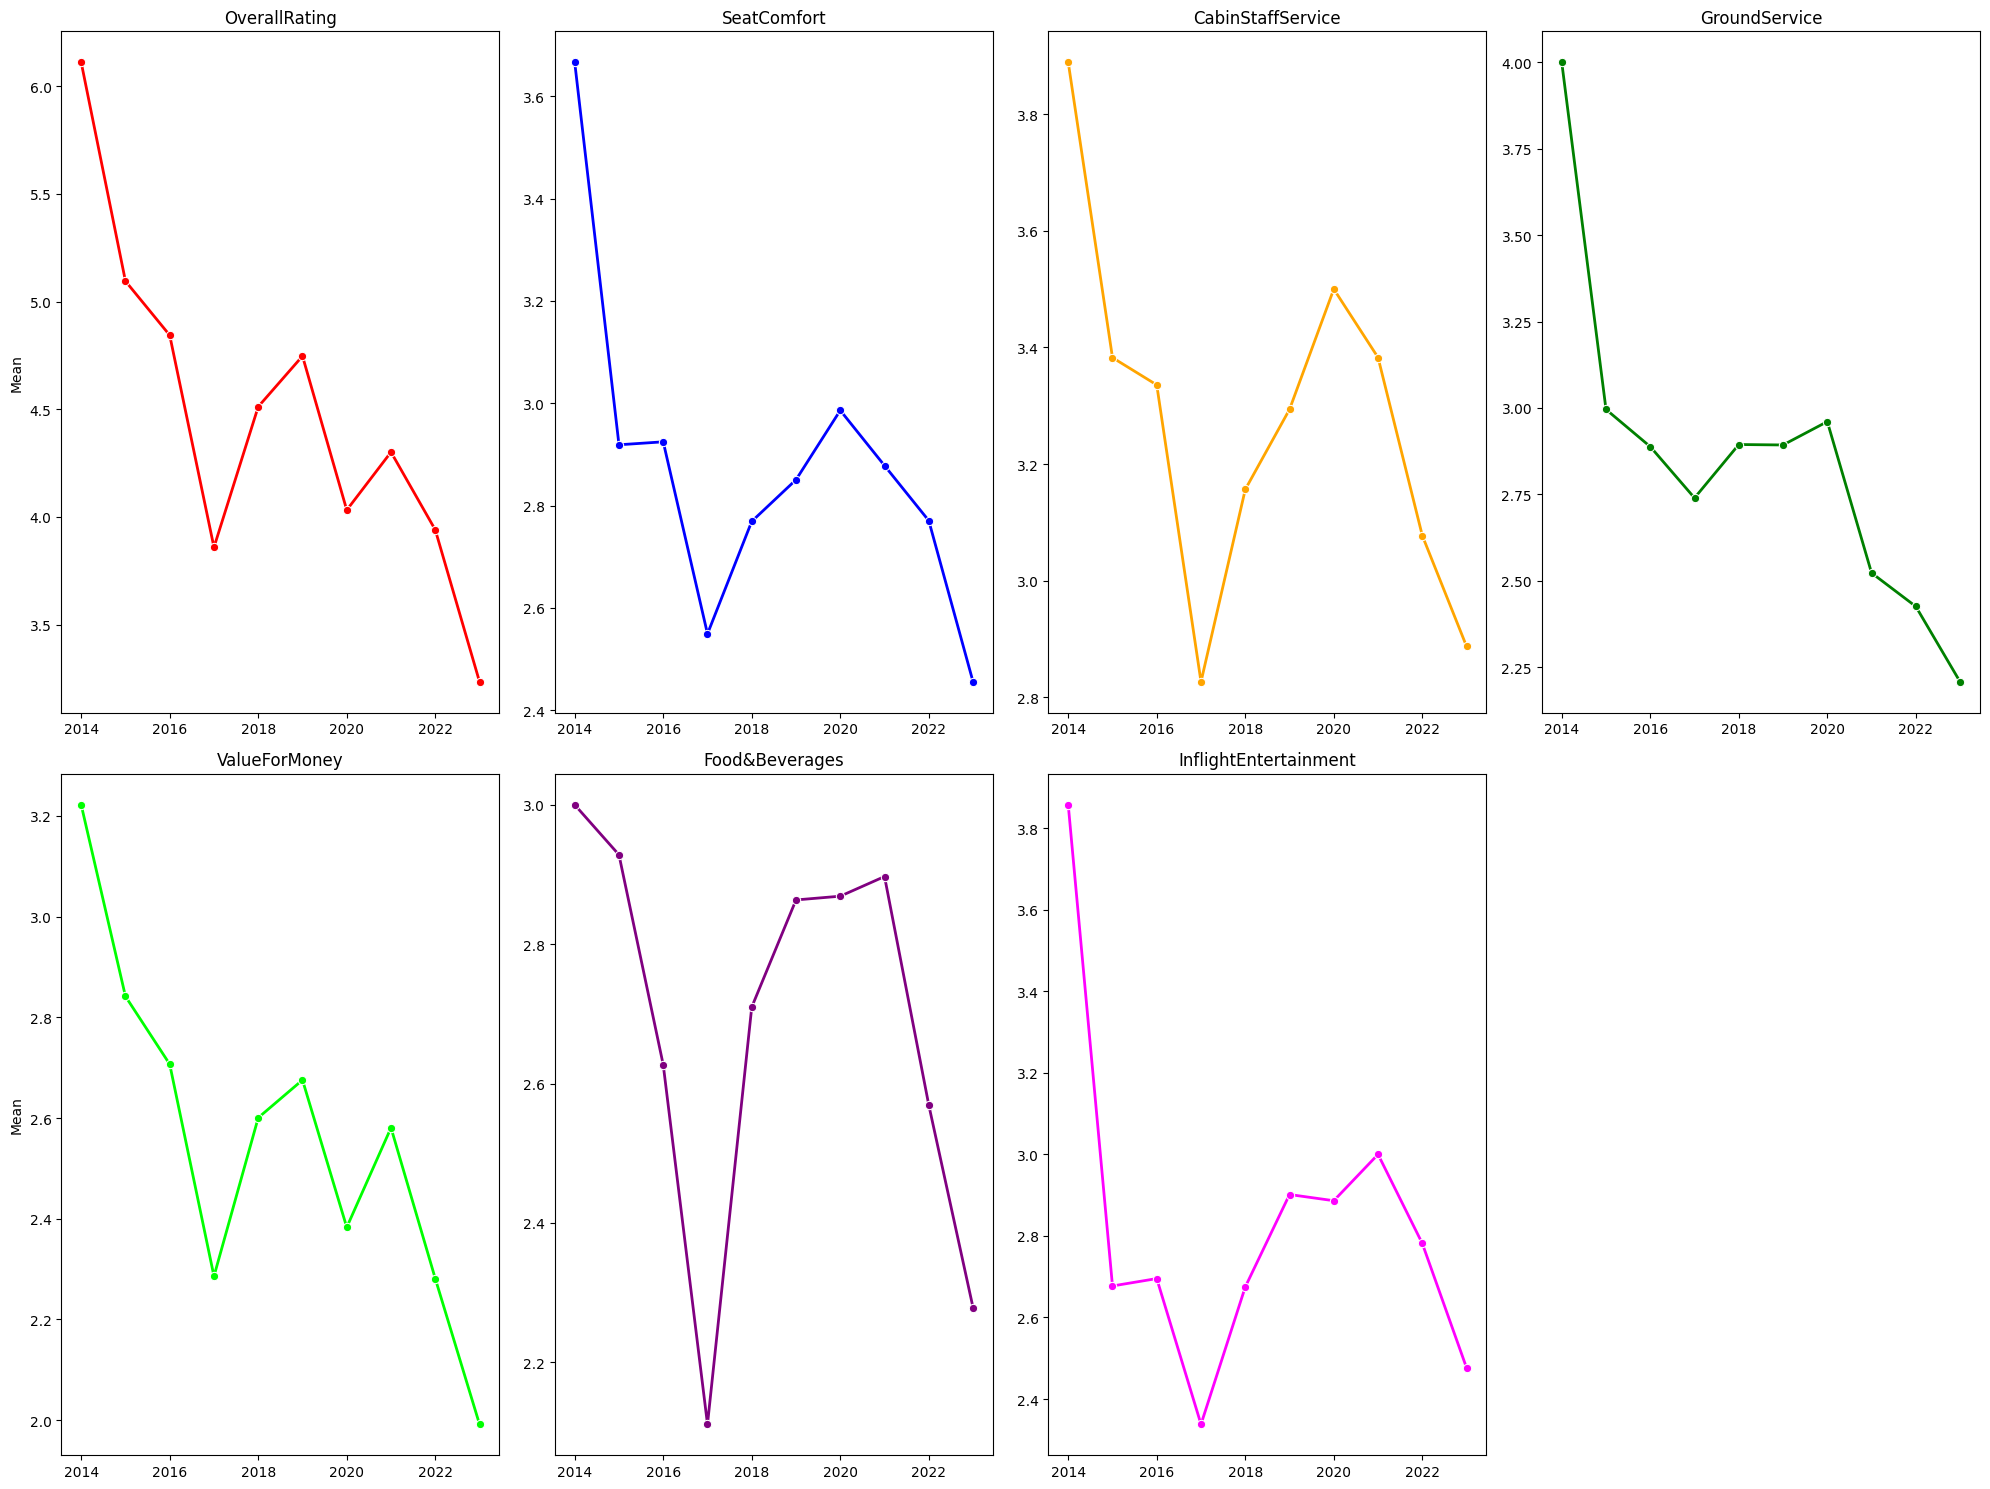

In [90]:
plot_grouped_df(grouped_by_years)

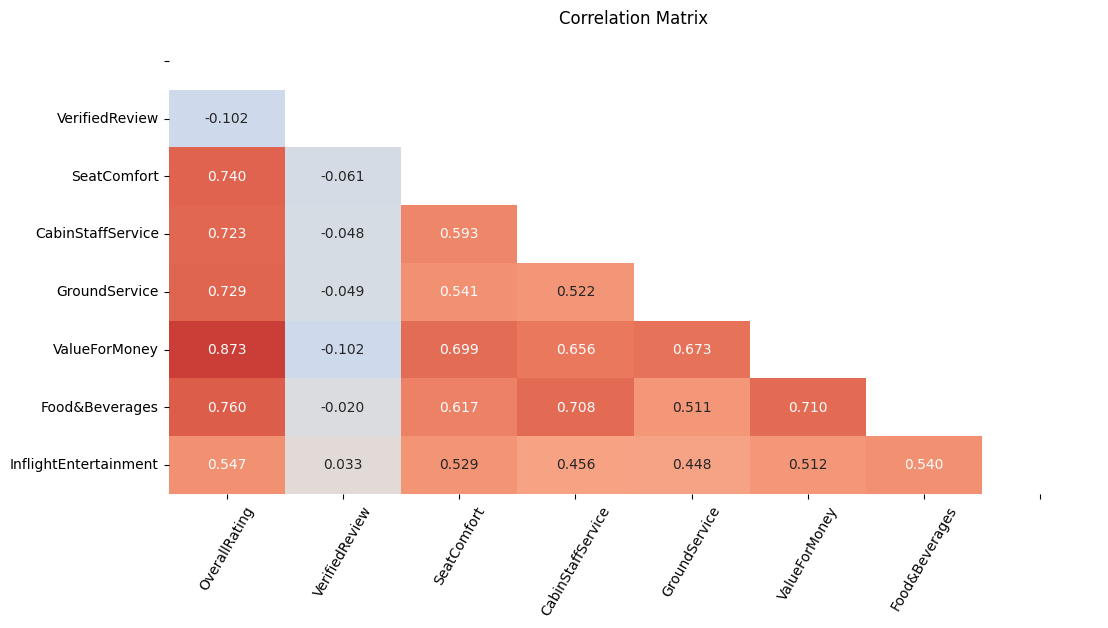

In [91]:
# correlation matrix of numeric features
plt.figure(figsize = (12,6))
corr_matrix = sns.heatmap(data = data.corr(numeric_only = True), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True, fmt = '.3f', 
            mask = np.triu(np.ones_like(data.corr(numeric_only = True))), cbar = False)
plt.title('Correlation Matrix')
xtick_labels = [label.get_text() for label in corr_matrix.get_xticklabels()]
xtick_labels[-1] = None
corr_matrix.set_xticklabels(xtick_labels, rotation = 60)
ytick_labels = [label.get_text() for label in corr_matrix.get_yticklabels()]
ytick_labels[0] = None
corr_matrix.set_yticklabels(ytick_labels)
plt.show();

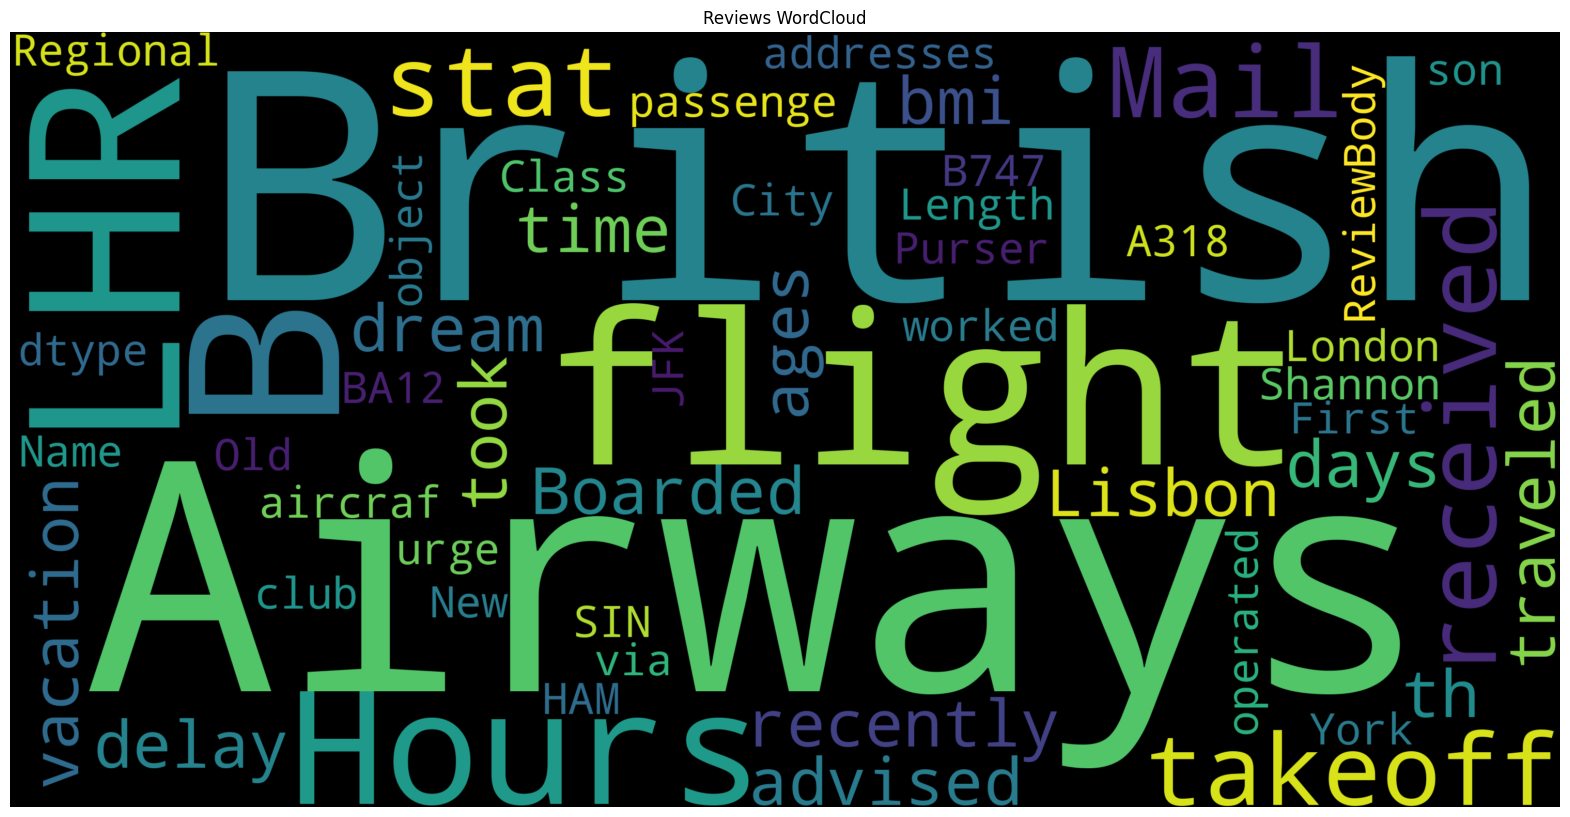

In [95]:
# wordclouds
plt.figure(figsize = (20,20))
wordcloud_img = WordCloud(width = 3000, height = 1500, background_color = 'black').generate(str(data.ReviewBody))
plt.imshow(wordcloud_img, interpolation = 'bilinear')
plt.axis('off')
plt.title('Reviews WordCloud')
plt.show();

__Machine Learning model based on text reviews is in airlines_clf.ipynb notebook.__